In [87]:

import pandas as pd
import matplotlib.pyplot as plt
import os

In [122]:
#load datasets
df_spending = pd.read_csv(r"C:\Users\user\Desktop\assignment3\data\spending_patterns_detailed.csv")
df_customers = pd.read_csv(r"C:\Users\user\Desktop\assignment3\data\MOCK_CUSTOMER_DATA.csv") #MOCK DATA GENERATED from MOCKEROO


In [91]:
# Step 3: Perform LEFT JOIN (Keep all spending data, even if no matching customer info)
df_left_join = df_spending.merge(df_customers, on="Customer ID", how="left")

In [93]:
# Step 4: Display first few rows of merged data
print(df_left_join.head())


  Customer ID   Category  Item  Quantity  Price Per Unit  Total Spent  \
0   CUST_0159  Groceries  Milk         1            1.28         1.28   
1   CUST_0159  Groceries  Milk         1            1.28         1.28   
2   CUST_0159  Groceries  Milk         1            1.28         1.28   
3   CUST_0159  Groceries  Milk         1            1.28         1.28   
4   CUST_0159  Groceries  Milk         1            1.28         1.28   

  Payment Method    Location Transaction Date first_name last_name  \
0     Debit Card  Mobile App       2024-11-13    Olimpia  Escudier   
1     Debit Card  Mobile App       2024-11-13        Edi     Bliss   
2     Debit Card  Mobile App       2024-11-13      Nonie    Fergie   
3     Debit Card  Mobile App       2024-11-13      Chloe   Spurdle   
4     Debit Card  Mobile App       2024-11-13    Paulina   Meiklem   

        gender  age   country  
0       Female   39    France  
1  Genderqueer   60     Japan  
2       Female   50    France  
3       Fema

In [95]:
print(df_left_join.info())  # Shows column names, data types, and non-null values
print(df_left_join.describe())  # Summary statistics for numeric columns
print(df_left_join.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508832 entries, 0 to 508831
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer ID       508832 non-null  object 
 1   Category          508832 non-null  object 
 2   Item              508832 non-null  object 
 3   Quantity          508832 non-null  int64  
 4   Price Per Unit    508832 non-null  float64
 5   Total Spent       508832 non-null  float64
 6   Payment Method    508832 non-null  object 
 7   Location          508832 non-null  object 
 8   Transaction Date  508832 non-null  object 
 9   first_name        508832 non-null  object 
 10  last_name         508832 non-null  object 
 11  gender            508832 non-null  object 
 12  age               508832 non-null  int64  
 13  country           508832 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 54.3+ MB
None
            Quantity  Price Per Unit    Total Spent 

In [96]:
save_path = r"C:\Users\user\Desktop\assignment3\Clean_data\combined_spending_data.csv"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

In [99]:
df_left_join.to_csv(save_path, index=False)  
print(f"Combined dataset saved at: {save_path}")

Combined dataset saved at: C:\Users\user\Desktop\assignment3\Clean_data\combined_spending_data.csv


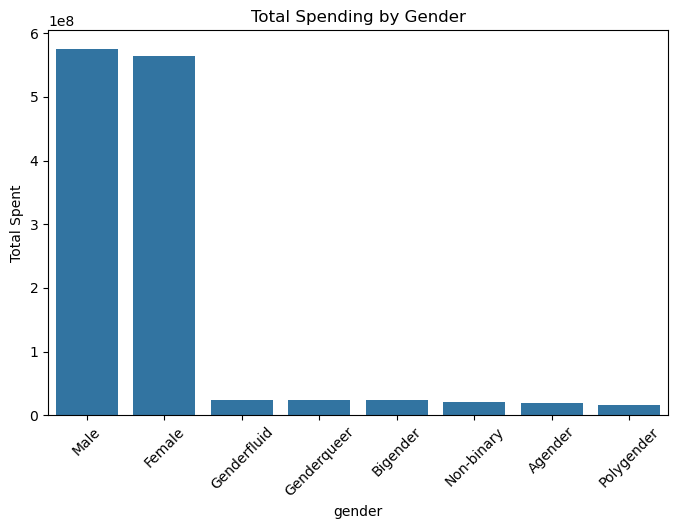

In [110]:
## 1. Total spending by gender
gender_spending = df_left_join.groupby("gender")["Total Spent"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title("Total Spending by Gender")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

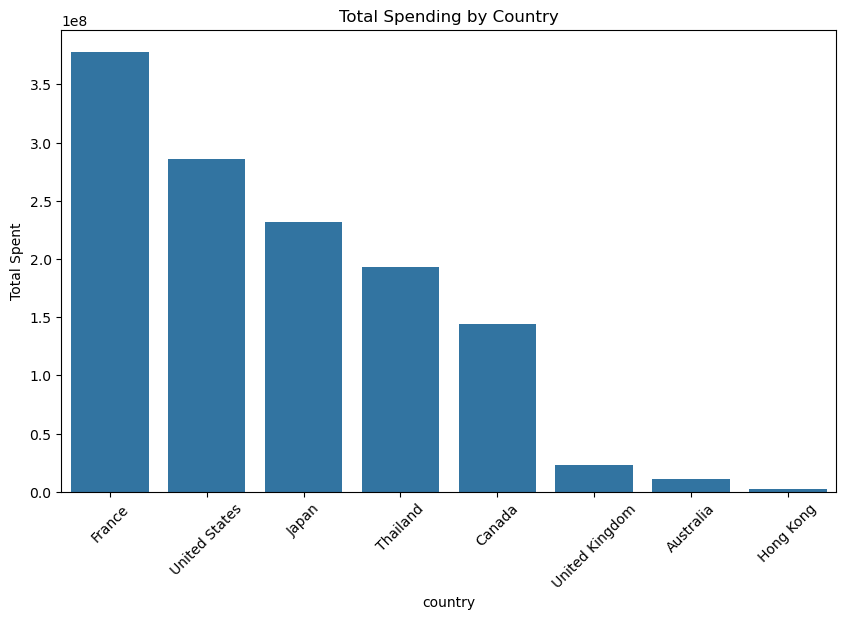

In [101]:
## 2. Total spending by country
country_spending = df_left_join.groupby("country")["Total Spent"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=country_spending.index, y=country_spending.values)
plt.title("Total Spending by Country")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

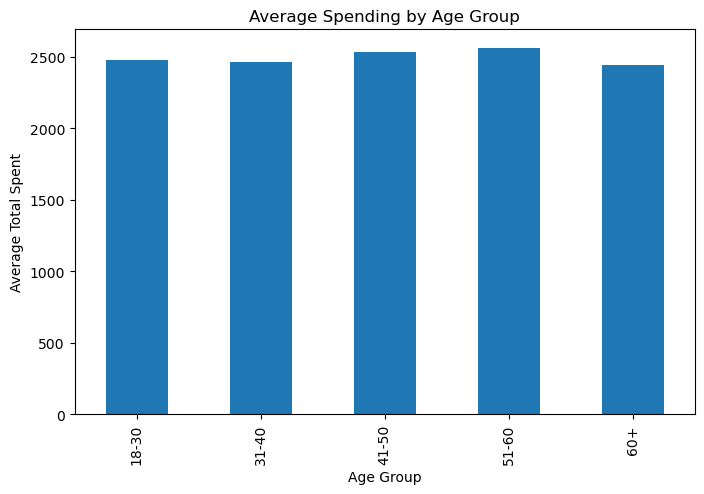

In [118]:
df_left_join["Age Group"] = pd.cut(df_left_join["age"], bins=[18, 30, 40, 50, 60, 100], 
                                   labels=["18-30", "31-40", "41-50", "51-60", "60+"], 
                                   include_lowest=True)

age_group_spending = df_left_join.groupby("Age Group", observed=False)["Total Spent"].mean()

age_group_spending.plot(kind="bar", title="Average Spending by Age Group", ylabel="Average Total Spent", figsize=(8,5))
plt.show()
